In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans, Birch
from scipy.cluster.hierarchy import dendrogram

import re
import string
import time
from PIL import Image
from collections import Counter

import plotly.express as px

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

nltk.download('stopwords', download_dir='./resources')
nltk.download('punkt', download_dir='./resources')
nltk.download('wordnet', download_dir='./resources')
nltk.download('omw-1.4', download_dir='./resources')
nltk.download('words', download_dir='./resources')
nltk.data.path.append('./resources')

[nltk_data] Downloading package stopwords to ./resources...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ./resources...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ./resources...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ./resources...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to ./resources...
[nltk_data]   Package words is already up-to-date!


# TODO: Birch Algorithm

In [2]:
data = pd.read_csv('./data/bbc_news.csv')
data

title  \
0     Ukraine: Angry Zelensky vows to punish Russian...   
1     War in Ukraine: Taking cover in a town under a...   
2            Ukraine war 'catastrophic for global food'   
3     Manchester Arena bombing: Saffie Roussos's par...   
4     Ukraine conflict: Oil price soars to highest l...   
...                                                 ...   
8116  What time is the Queen's funeral? Who will wea...   
8117  Queen's funeral guests: Who will - and who won...   
8118    The cowboy and the Queen who bonded over horses   
8119   Queen amused by an American's breach of protocol   
8120  Queen Elizabeth II's special connection with W...   

                            pubDate  \
0     Mon, 07 Mar 2022 08:01:56 GMT   
1     Sun, 06 Mar 2022 22:49:58 GMT   
2     Mon, 07 Mar 2022 00:14:42 GMT   
3     Mon, 07 Mar 2022 00:05:40 GMT   
4     Mon, 07 Mar 2022 08:15:53 GMT   
...                             ...   
8116  Sat, 17 Sep 2022 22:54:46 GMT   
8117  Sat, 17 Sep 2022 06:25:17 GMT   
8118  Fri, 16 Sep 2022 23:01:06 GMT   
8119  Fri, 16 Sep 2022 14:52:59 GMT   
8120  Sat, 17 Sep 2022 06:38:22 GMT   

                                                   guid  \
0      https://www.bbc.co.uk/news/world-europe-60638042   
1      https://www.bbc.co.uk/news/world-europe-60641873   
2          https://www.bbc.co.uk/news/business-60623941   
3                https://www.bbc.co.uk/news/uk-60579079   
4          https://www.bbc.co.uk/news/business-60642786   
...                                                 ...   
8116             https://www.bbc.co.uk/news/uk-62844663   
8117             https://www.bbc.co.uk/news/uk-62890879   
8118  https://www.bbc.co.uk/news/world-us-canada-629...   
8119  https://www.bbc.co.uk/news/world-us-canada-629...   
8120  https://www.bbc.co.uk/news/uk-england-berkshir...   

                                                   link  \
0     https://www.bbc.co.uk/news/world-europe-606380...   
1     https://www.bbc.co.uk/news/world-europe-606418...   
2     https://www.bbc.co.uk/news/business-60623941?a...   
3     https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4     https://www.bbc.co.uk/news/business-60642786?a...   
...                                                 ...   
8116  https://www.bbc.co.uk/news/uk-62844663?at_medi...   
8117  https://www.bbc.co.uk/news/uk-62890879?at_medi...   
8118  https://www.bbc.co.uk/news/world-us-canada-629...   
8119  https://www.bbc.co.uk/news/world-us-canada-629...   
8120  https://www.bbc.co.uk/news/uk-england-berkshir...   

                                            description  
0     The Ukrainian president says the country will ...  
1     Jeremy Bowen was on the frontline in Irpin, as...  
2     One of the world's biggest fertiliser firms sa...  
3     The parents of the Manchester Arena bombing's ...  
4     Consumers are feeling the impact of higher ene...  
...                                                 ...  
8116  The death of Queen Elizabeth II has had a majo...  
8117  Here's what we know so far about who will and ...  
8118  Sitting with the heads of state at Monday's fu...  
8119  When the monarch visited a US housing project ...  
8120  The Queen's association with Windsor Great Par...  

[8121 rows x 5 columns]

In [3]:
data['pubDate'] = pd.to_datetime(data['pubDate'], infer_datetime_format=True)
data

title             pubDate  \
0     Ukraine: Angry Zelensky vows to punish Russian... 2022-03-07 08:01:56   
1     War in Ukraine: Taking cover in a town under a... 2022-03-06 22:49:58   
2            Ukraine war 'catastrophic for global food' 2022-03-07 00:14:42   
3     Manchester Arena bombing: Saffie Roussos's par... 2022-03-07 00:05:40   
4     Ukraine conflict: Oil price soars to highest l... 2022-03-07 08:15:53   
...                                                 ...                 ...   
8116  What time is the Queen's funeral? Who will wea... 2022-09-17 22:54:46   
8117  Queen's funeral guests: Who will - and who won... 2022-09-17 06:25:17   
8118    The cowboy and the Queen who bonded over horses 2022-09-16 23:01:06   
8119   Queen amused by an American's breach of protocol 2022-09-16 14:52:59   
8120  Queen Elizabeth II's special connection with W... 2022-09-17 06:38:22   

                                                   guid  \
0      https://www.bbc.co.uk/news/world-europe-60638042   
1      https://www.bbc.co.uk/news/world-europe-60641873   
2          https://www.bbc.co.uk/news/business-60623941   
3                https://www.bbc.co.uk/news/uk-60579079   
4          https://www.bbc.co.uk/news/business-60642786   
...                                                 ...   
8116             https://www.bbc.co.uk/news/uk-62844663   
8117             https://www.bbc.co.uk/news/uk-62890879   
8118  https://www.bbc.co.uk/news/world-us-canada-629...   
8119  https://www.bbc.co.uk/news/world-us-canada-629...   
8120  https://www.bbc.co.uk/news/uk-england-berkshir...   

                                                   link  \
0     https://www.bbc.co.uk/news/world-europe-606380...   
1     https://www.bbc.co.uk/news/world-europe-606418...   
2     https://www.bbc.co.uk/news/business-60623941?a...   
3     https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4     https://www.bbc.co.uk/news/business-60642786?a...   
...                                                 ...   
8116  https://www.bbc.co.uk/news/uk-62844663?at_medi...   
8117  https://www.bbc.co.uk/news/uk-62890879?at_medi...   
8118  https://www.bbc.co.uk/news/world-us-canada-629...   
8119  https://www.bbc.co.uk/news/world-us-canada-629...   
8120  https://www.bbc.co.uk/news/uk-england-berkshir...   

                                            description  
0     The Ukrainian president says the country will ...  
1     Jeremy Bowen was on the frontline in Irpin, as...  
2     One of the world's biggest fertiliser firms sa...  
3     The parents of the Manchester Arena bombing's ...  
4     Consumers are feeling the impact of higher ene...  
...                                                 ...  
8116  The death of Queen Elizabeth II has had a majo...  
8117  Here's what we know so far about who will and ...  
8118  Sitting with the heads of state at Monday's fu...  
8119  When the monarch visited a US housing project ...  
8120  The Queen's association with Windsor Great Par...  

[8121 rows x 5 columns]

In [4]:
data['combined'] = data['title'] + ' ' + data['description']
data['combined']

0       Ukraine: Angry Zelensky vows to punish Russian...
1       War in Ukraine: Taking cover in a town under a...
2       Ukraine war 'catastrophic for global food' One...
3       Manchester Arena bombing: Saffie Roussos's par...
4       Ukraine conflict: Oil price soars to highest l...
                              ...                        
8116    What time is the Queen's funeral? Who will wea...
8117    Queen's funeral guests: Who will - and who won...
8118    The cowboy and the Queen who bonded over horse...
8119    Queen amused by an American's breach of protoc...
8120    Queen Elizabeth II's special connection with W...
Name: combined, Length: 8121, dtype: object

In [5]:
STOPWORDS = stopwords.words('english')
pd.Series(STOPWORDS)

0             i
1            me
2            my
3        myself
4            we
         ...   
174     weren't
175         won
176       won't
177      wouldn
178    wouldn't
Length: 179, dtype: object

# Data preparation

## Cleaning and lammatization

In [6]:
lemmatizer = WordNetLemmatizer()

In [7]:
data['combined_cleaned'] = data['combined'].str.lower().apply(lambda x: re.sub(f'[{re.escape(string.punctuation)}]', '', x))
data['combined_cleaned'] = data['combined_cleaned'].str.strip()

In [8]:
data['combined_cleaned']=data['combined_cleaned'].apply(lambda x: ' '.join(map(lemmatizer.lemmatize, filter(lambda w: w not in STOPWORDS, nltk.tokenize.word_tokenize(x)))))
data['combined'][100], data['combined_cleaned'][100]

('Doctors call on Wales not to pick Francis following head injury against England The decision to declare Wales prop Tomas Francis fit to face France in the Six Nations in Cardiff on Friday has been described as a "grave mistake".',
 'doctor call wale pick francis following head injury england decision declare wale prop tomas francis fit face france six nation cardiff friday described grave mistake')

## Vectorization

In [9]:
cv = CountVectorizer(analyzer='word')
cv_data = cv.fit_transform(data['combined_cleaned'])
dtm_data = pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names_out())
dtm_data.index = data.index
dtm_data.head(5)

00  007  008  01  0100  02  03  03mm  04  05  ...  zookeepers  zoom  zsl  \
0   0    0    0   0     0   0   0     0   0   0  ...           0     0    0   
1   0    0    0   0     0   0   0     0   0   0  ...           0     0    0   
2   0    0    0   0     0   0   0     0   0   0  ...           0     0    0   
3   0    0    0   0     0   0   0     0   0   0  ...           0     0    0   
4   0    0    0   0     0   0   0     0   0   0  ...           0     0    0   

   zuckerberg  zulu  zurich  zuu  zverev  zwelithini  úsuga  
0           0     0       0    0       0           0      0  
1           0     0       0    0       0           0      0  
2           0     0       0    0       0           0      0  
3           0     0       0    0       0           0      0  
4           0     0       0    0       0           0      0  

[5 rows x 16381 columns]

In [10]:
word_freq_data_normalized = dtm_data.T
word_freq_data_normalized

0     1     2     3     4     5     6     7     8     9     ...  \
00             0     0     0     0     0     0     0     0     0     0  ...   
007            0     0     0     0     0     0     0     0     0     0  ...   
008            0     0     0     0     0     0     0     0     0     0  ...   
01             0     0     0     0     0     0     0     0     0     0  ...   
0100           0     0     0     0     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
zurich         0     0     0     0     0     0     0     0     0     0  ...   
zuu            0     0     0     0     0     0     0     0     0     0  ...   
zverev         0     0     0     0     0     0     0     0     0     0  ...   
zwelithini     0     0     0     0     0     0     0     0     0     0  ...   
úsuga          0     0     0     0     0     0     0     0     0     0  ...   

            8111  8112  8113  8114  8115  8116  8117  8118  8119  8120  
00             0     0     0     0     0     0     0     0     0     0  
007            0     0     0     0     0     0     0     0     0     0  
008            0     0     0     0     0     0     0     0     0     0  
01             0     0     0     0     0     0     0     0     0     0  
0100           0     0     0     0     0     0     0     0     0     0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
zurich         0     0     0     0     0     0     0     0     0     0  
zuu            0     0     0     0     0     0     0     0     0     0  
zverev         0     0     0     0     0     0     0     0     0     0  
zwelithini     0     0     0     0     0     0     0     0     0     0  
úsuga          0     0     0     0     0     0     0     0     0     0  

[16381 rows x 8121 columns]

In [11]:
word_freq_data = pd.DataFrame(word_freq_data_normalized.sum(axis=1).reset_index()).rename(columns={'index': 'word', 0: 'freq'})
word_freq_data

word  freq
0              00     9
1             007     1
2             008     2
3              01    17
4            0100     1
...           ...   ...
16376      zurich     5
16377         zuu     3
16378      zverev     4
16379  zwelithini     2
16380       úsuga     1

[16381 rows x 2 columns]

In [12]:
nltk_lems = [lemmatizer.lemmatize(word) for word in nltk_words.words()]
df_nltk_words = pd.DataFrame() # make a new dataframe with the stemmed #NLTK words
df_nltk_words['word'] = nltk_lems
word_freq_data = word_freq_data[word_freq_data['word'].isin(df_nltk_words['word'])] # keep only #those in the lemmed NLTK corpus
word_freq_data

word  freq
732           aa     2
737      abandon     1
738    abandoned    12
741        abbey     9
749      abdomen     1
...          ...   ...
16360       zinc     1
16367     zombie     1
16369       zone    14
16370        zoo    17
16372       zoom     4

[8140 rows x 2 columns]

In [13]:
TRIM_QUANTILE = 0.7
word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]

word  freq
738    abandoned    12
741        abbey     9
766      ability     7
768         able    26
771     abortion    79
...          ...   ...
16312      youth     7
16326        zak     7
16346       zero     8
16369       zone    14
16370        zoo    17

[2526 rows x 2 columns]

In [14]:
stopwords = list(word_freq_data[word_freq_data['freq'] < word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])
vec_vocab = list(word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])

In [15]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, vocabulary=vec_vocab)
tfidf_vectorizer

TfidfVectorizer(stop_words=['aa', 'abandon', 'abdomen', 'abdominal', 'abduct',
                            'abduction', 'abey', 'ablaze', 'aboard',
                            'aboriginal', 'absentee', 'absolute', 'absolutely',
                            'absorbing', 'abstain', 'absurd', 'abu', 'abundant',
                            'abuser', 'abusive', 'abyss', 'academic',
                            'acapulco', 'accelerated', 'accept', 'acceptable',
                            'acceptance', 'accepted', 'accessible', 'accession', ...],
                vocabulary=['abandoned', 'abbey', 'ability', 'able', 'abortion',
                            'abroad', 'absence', 'abuse', 'academy', 'access',
                            'accident', 'according', 'account', 'accuse',
                            'accused', 'across', 'act', 'acting', 'action',
                            'activist', 'actor', 'actress', 'ad', 'add',
                            'added', 'addiction', 'address', 'admitted',
                            'adult', 'advance', ...])

In [16]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_cleaned'])
tfidf_matrix

<8121x2526 sparse matrix of type '<class 'numpy.float64'>'
	with 80689 stored elements in Compressed Sparse Row format>

In [17]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

0     1     2     3     4     5     6     7     8     9     ...  2516  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8116   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8117   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8118   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8119   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8120   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      2517  2518  2519  2520  2521  2522  2523  2524  2525  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
8116   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8117   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8118   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8119   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8120   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[8121 rows x 2526 columns]

In [18]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['abandoned', 'abbey', 'ability', ..., 'zero', 'zone', 'zoo'],
      dtype=object)

In [19]:
tfidf_data.columns = feature_names
tfidf_data

abandoned  abbey  ability  able  abortion  abroad  absence  abuse  \
0           0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
1           0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
2           0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
3           0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
4           0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
...         ...    ...      ...   ...       ...     ...      ...    ...   
8116        0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
8117        0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
8118        0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
8119        0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   
8120        0.0    0.0      0.0   0.0       0.0     0.0      0.0    0.0   

      academy  access  ...  year  yet  york  young  younger  youth  zak  zero  \
0         0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
1         0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
2         0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
3         0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
4         0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
...       ...     ...  ...   ...  ...   ...    ...      ...    ...  ...   ...   
8116      0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
8117      0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
8118      0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
8119      0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   
8120      0.0     0.0  ...   0.0  0.0   0.0    0.0      0.0    0.0  0.0   0.0   

      zone  zoo  
0      0.0  0.0  
1      0.0  0.0  
2      0.0  0.0  
3      0.0  0.0  
4      0.0  0.0  
...    ...  ...  
8116   0.0  0.0  
8117   0.0  0.0  
8118   0.0  0.0  
8119   0.0  0.0  
8120   0.0  0.0  

[8121 rows x 2526 columns]

# Truncated SVD

In [20]:
tsvd = TruncatedSVD(n_components=100, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 0.10802648, -0.06785557, -0.01159277, ...,  0.00479723,
         0.05265962,  0.02934457],
       [ 0.10144961, -0.10102837, -0.08533588, ...,  0.04130995,
        -0.0713699 , -0.0403346 ],
       [ 0.20349202, -0.09237085, -0.06624047, ...,  0.03662255,
         0.02916891, -0.00229857],
       ...,
       [ 0.06461535,  0.01554009,  0.19932304, ..., -0.03898018,
        -0.04264745, -0.04535859],
       [ 0.04364374,  0.01013638,  0.12373292, ...,  0.02702599,
         0.01712036,  0.00562065],
       [ 0.07944684,  0.03733333,  0.17354278, ...,  0.00343151,
         0.01918997, -0.02557188]])

In [21]:
pd.DataFrame(vec_matrix_tsvd)

0         1         2         3         4         5         6   \
0     0.108026 -0.067856 -0.011593 -0.014153 -0.016125 -0.045873  0.009104   
1     0.101450 -0.101028 -0.085336  0.055705 -0.012890 -0.003953  0.012171   
2     0.203492 -0.092371 -0.066240 -0.032864 -0.042782 -0.044097 -0.047595   
3     0.046654 -0.018312  0.006209  0.008765 -0.004701 -0.045608  0.018839   
4     0.114921 -0.102461  0.125434 -0.216464 -0.027818  0.083508  0.033979   
...        ...       ...       ...       ...       ...       ...       ...   
8116  0.126052  0.019595  0.243183  0.304980 -0.102912 -0.009232 -0.016278   
8117  0.066887  0.019979  0.156336  0.199053 -0.063011  0.005446  0.003946   
8118  0.064615  0.015540  0.199323  0.254013 -0.076433  0.005672 -0.007335   
8119  0.043644  0.010136  0.123733  0.144456 -0.049936 -0.002821 -0.007011   
8120  0.079447  0.037333  0.173543  0.222626 -0.078673 -0.012023 -0.002464   

            7         8         9   ...        90        91        92  \
0    -0.034687 -0.038345 -0.079635  ... -0.026736 -0.047745  0.018542   
1    -0.003272  0.010007  0.034756  ...  0.014642  0.074497 -0.019709   
2     0.162241 -0.022834 -0.065719  ...  0.041109 -0.086892 -0.001696   
3    -0.002261 -0.015036  0.034253  ... -0.039569  0.021321 -0.006260   
4     0.220581  0.240900  0.018504  ...  0.000990 -0.012106  0.028233   
...        ...       ...       ...  ...       ...       ...       ...   
8116  0.031348  0.056622 -0.014674  ...  0.020534  0.062717 -0.045185   
8117  0.018068  0.020157 -0.036208  ... -0.142905  0.005937  0.060574   
8118  0.022258  0.039979 -0.040176  ...  0.041058  0.026111  0.067135   
8119  0.010685  0.011403 -0.023430  ...  0.016614  0.008959 -0.021702   
8120  0.044551  0.037180 -0.011177  ... -0.003962 -0.065383 -0.021606   

            93        94        95        96        97        98        99  
0     0.039254  0.027370  0.020813  0.021152  0.004797  0.052660  0.029345  
1    -0.026959 -0.000144  0.000745 -0.015025  0.041310 -0.071370 -0.040335  
2    -0.048212 -0.018033  0.098982  0.009261  0.036623  0.029169 -0.002299  
3     0.051427 -0.040062 -0.048296 -0.014483 -0.022246  0.026283 -0.005207  
4    -0.012522  0.029307 -0.017088  0.034389  0.018366  0.008326  0.050612  
...        ...       ...       ...       ...       ...       ...       ...  
8116 -0.032142  0.015261  0.009254 -0.007878  0.000890 -0.028008 -0.049210  
8117  0.031866 -0.061748  0.045540  0.004934  0.003851 -0.000425  0.007878  
8118  0.018167 -0.011252 -0.016055 -0.003674 -0.038980 -0.042647 -0.045359  
8119 -0.007641  0.007372 -0.014263  0.002523  0.027026  0.017120  0.005621  
8120  0.039958  0.017147 -0.065926  0.003229  0.003432  0.019190 -0.025572  

[8121 rows x 100 columns]

In [22]:
BATCH_SIZE = 10

In [23]:
kmeans_clst = MiniBatchKMeans(n_clusters=5, random_state=37, batch_size=10)
kmeans_clst = kmeans_clst.partial_fit(vec_matrix_tsvd)

In [24]:
kmeans_clst.cluster_centers_

array([[ 1.35811486e-01, -1.13372192e-01, -8.79502361e-02,
         4.76935391e-02, -6.48082138e-03,  1.20789707e-02,
         9.48414952e-03,  9.64210838e-03,  4.47757897e-03,
         2.41404437e-02, -1.31705186e-02, -3.81332951e-02,
        -4.34814718e-02, -5.19687272e-02,  3.75638650e-02,
         4.05007338e-02, -1.53613767e-02,  5.17375842e-03,
        -1.47857986e-02,  1.71448506e-02,  1.25616256e-02,
         1.90807383e-02, -1.69516189e-02, -1.49650889e-03,
        -7.11041667e-03,  1.04685877e-02, -2.01467163e-02,
         1.68994313e-02,  6.38643743e-03,  1.11740067e-02,
        -3.39974330e-03, -3.89291972e-03,  9.99251661e-04,
        -1.51153537e-02,  8.62042301e-05,  7.14637975e-04,
         1.77404298e-02, -1.48897482e-02,  5.11435541e-03,
        -3.42676782e-03,  8.51873847e-03, -2.98538260e-03,
        -8.50818060e-04, -1.38739079e-02,  1.32831025e-02,
         3.31100870e-03,  2.62093905e-03,  1.53871526e-03,
         6.45004545e-03,  1.76055435e-02, -5.52364454e-0

In [25]:
kmeans_clst.labels_

array([3, 0, 0, ..., 3, 3, 3], dtype=int32)

In [26]:
data['kmeans_label'] = kmeans_clst.labels_

# Visualizing results

In [27]:
tsvd_centers = TruncatedSVD(n_components=2, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d2_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d2_points = tsvd_centers.transform(vec_matrix_tsvd)

In [28]:
tsvd_centers = TruncatedSVD(n_components=3, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d3_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d3_points = tsvd_centers.transform(vec_matrix_tsvd)

In [29]:
d2_centers

array([[ 0.02436045,  0.17541433],
       [ 0.48648072, -0.03980711],
       [ 0.0203505 ,  0.05654257],
       [ 0.02063135,  0.03707762],
       [ 0.03836949,  0.3434132 ]])

In [30]:
d2_points

array([[ 0.01961778,  0.05789301],
       [ 0.0277387 ,  0.17457418],
       [ 0.02540294,  0.12620849],
       ...,
       [ 0.13120912, -0.00885864],
       [ 0.13022635, -0.01220372],
       [ 0.18422046, -0.01705311]])

In [31]:
sns.set_style('darkgrid')

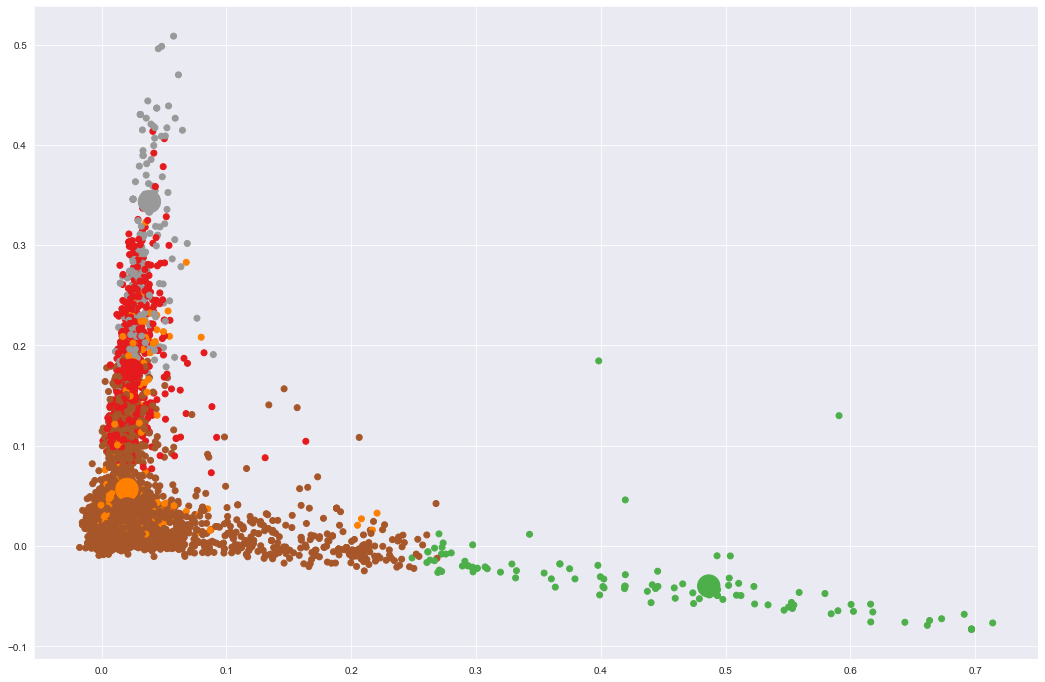

In [32]:
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=kmeans_clst.labels_, cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=np.unique(kmeans_clst.labels_), s=[500, 500, 500, 500, 500], cmap='Set1')

In [33]:
fig_centers = px.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], color=np.unique(kmeans_clst.labels_), size=[500, 500, 500, 500, 500])
fig_points = px.scatter(x=d2_points[:, 0], y=d2_points[:, 1], color=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data)
fig.add_traces(fig_points.data)
fig.show()

In [34]:
fig_centers = px.scatter_3d(x=d3_centers[:, 0], y=d3_centers[:, 1], z=d3_centers[:, 2], color=np.unique(kmeans_clst.labels_), size=[50, 50, 50, 50, 50], size_max=50)
fig_points = px.scatter_3d(x=d3_points[:, 0], y=d3_points[:, 1], z=d3_points[:, 2], color=kmeans_clst.labels_, symbol=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data + fig_points.data)
fig.show()

In [35]:
def to_viz_data(data, tfidf_data, labels):
    transformed_data = []
    for label in labels:
        new_data = tfidf_data[tfidf_data[data['label'] == label].idxmax(axis=1)].max()[:200]
        transformed_data.append(pd.concat([new_data.reset_index(), pd.Series([label] * len(new_data))], axis=1))
    viz_data = pd.concat(transformed_data)
    viz_data.columns = ['word', 'tfidf', 'label']
    return viz_data

In [36]:
viz_data = to_viz_data(data.rename({'kmeans_label': 'label'}, axis=1), tfidf_data, data['kmeans_label'].unique())
viz_data

word     tfidf  label
0    atrocity  0.588538      3
1       arena  0.620304      3
2       price  0.613648      3
3     content  0.440390      3
4     testing  0.407611      3
..        ...       ...    ...
101     queen  0.580556      1
102    follow  0.576622      1
103      bear  0.674125      1
104     queen  0.580556      1
105     queen  0.580556      1

[906 rows x 3 columns]

In [37]:
def visualize_clusters(viz_data):
    viz_data = viz_data.copy()
    viz_data['label'] += np.abs(viz_data['label'].min())
    viz_data = viz_data.sort_values('label').groupby('label').head(20)
    fig = px.scatter(viz_data, x='label', y='tfidf', color='label', text='word', hover_data=['label', 'tfidf', 'word'])
    fig.update_layout(
        font=dict(
            family='Courier New, monospace',
            size=18,  # Set the font size here
            color='black'
        ),
        xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1
        ),
        yaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 0.05
        )
    )
    text_fonts = (np.e**(viz_data['tfidf'] * 4.5)).astype(int)
    fig.update_traces(mode='text', selector=dict(type='scatter'), textfont_size=(text_fonts).values)
    fig.for_each_trace(lambda t: t.update(textfont_color=np.array(px.colors.qualitative.Dark24)[t.marker.color], textposition='bottom center'))
    fig.show()

In [38]:
visualize_clusters(viz_data)

# New Data

In [39]:
new_data = pd.read_csv('./data/bbc_news_new.csv')
new_data

title  \
0     Ukraine: Angry Zelensky vows to punish Russian...   
1     War in Ukraine: Taking cover in a town under a...   
2            Ukraine war 'catastrophic for global food'   
3     Manchester Arena bombing: Saffie Roussos's par...   
4     Ukraine conflict: Oil price soars to highest l...   
...                                                 ...   
8349  Super League Grand Final: St Helens 24-12 Leed...   
8350  England v India: Deepti Sharma dismisses Charl...   
8351  Beth Mead: Arsenal forward says record WSL cro...   
8352  Terri Harper secures WBA title with dominant w...   
8353  England v India: Lord's finale ends with contr...   

                            pubDate  \
0     Mon, 07 Mar 2022 08:01:56 GMT   
1     Sun, 06 Mar 2022 22:49:58 GMT   
2     Mon, 07 Mar 2022 00:14:42 GMT   
3     Mon, 07 Mar 2022 00:05:40 GMT   
4     Mon, 07 Mar 2022 08:15:53 GMT   
...                             ...   
8349  Sat, 24 Sep 2022 19:32:42 GMT   
8350  Sat, 24 Sep 2022 18:00:46 GMT   
8351  Sat, 24 Sep 2022 17:27:57 GMT   
8352  Sat, 24 Sep 2022 21:52:39 GMT   
8353  Sat, 24 Sep 2022 18:24:43 GMT   

                                                   guid  \
0      https://www.bbc.co.uk/news/world-europe-60638042   
1      https://www.bbc.co.uk/news/world-europe-60641873   
2          https://www.bbc.co.uk/news/business-60623941   
3                https://www.bbc.co.uk/news/uk-60579079   
4          https://www.bbc.co.uk/news/business-60642786   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022722   
8350    https://www.bbc.co.uk/sport/av/cricket/63022555   
8351      https://www.bbc.co.uk/sport/football/63021212   
8352        https://www.bbc.co.uk/sport/boxing/63023286   
8353       https://www.bbc.co.uk/sport/cricket/63021184   

                                                   link  \
0     https://www.bbc.co.uk/news/world-europe-606380...   
1     https://www.bbc.co.uk/news/world-europe-606418...   
2     https://www.bbc.co.uk/news/business-60623941?a...   
3     https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4     https://www.bbc.co.uk/news/business-60642786?a...   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022...   
8350  https://www.bbc.co.uk/sport/av/cricket/6302255...   
8351  https://www.bbc.co.uk/sport/football/63021212?...   
8352  https://www.bbc.co.uk/sport/boxing/63023286?at...   
8353  https://www.bbc.co.uk/sport/cricket/63021184?a...   

                                            description  
0     The Ukrainian president says the country will ...  
1     Jeremy Bowen was on the frontline in Irpin, as...  
2     One of the world's biggest fertiliser firms sa...  
3     The parents of the Manchester Arena bombing's ...  
4     Consumers are feeling the impact of higher ene...  
...                                                 ...  
8349  St Helens win a record-breaking fourth consecu...  
8350  Watch Deepti Sharma's controversial 'Mankad' d...  
8351  A record Women's Super League crowd is "still ...  
8352  Terri Harper is crowned the new WBA super-welt...  
8353  India complete a 3-0 series whitewash over Eng...  

[8354 rows x 5 columns]

In [40]:
new_data['pubDate'] = pd.to_datetime(new_data['pubDate'], infer_datetime_format=True)
new_data

title             pubDate  \
0     Ukraine: Angry Zelensky vows to punish Russian... 2022-03-07 08:01:56   
1     War in Ukraine: Taking cover in a town under a... 2022-03-06 22:49:58   
2            Ukraine war 'catastrophic for global food' 2022-03-07 00:14:42   
3     Manchester Arena bombing: Saffie Roussos's par... 2022-03-07 00:05:40   
4     Ukraine conflict: Oil price soars to highest l... 2022-03-07 08:15:53   
...                                                 ...                 ...   
8349  Super League Grand Final: St Helens 24-12 Leed... 2022-09-24 19:32:42   
8350  England v India: Deepti Sharma dismisses Charl... 2022-09-24 18:00:46   
8351  Beth Mead: Arsenal forward says record WSL cro... 2022-09-24 17:27:57   
8352  Terri Harper secures WBA title with dominant w... 2022-09-24 21:52:39   
8353  England v India: Lord's finale ends with contr... 2022-09-24 18:24:43   

                                                   guid  \
0      https://www.bbc.co.uk/news/world-europe-60638042   
1      https://www.bbc.co.uk/news/world-europe-60641873   
2          https://www.bbc.co.uk/news/business-60623941   
3                https://www.bbc.co.uk/news/uk-60579079   
4          https://www.bbc.co.uk/news/business-60642786   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022722   
8350    https://www.bbc.co.uk/sport/av/cricket/63022555   
8351      https://www.bbc.co.uk/sport/football/63021212   
8352        https://www.bbc.co.uk/sport/boxing/63023286   
8353       https://www.bbc.co.uk/sport/cricket/63021184   

                                                   link  \
0     https://www.bbc.co.uk/news/world-europe-606380...   
1     https://www.bbc.co.uk/news/world-europe-606418...   
2     https://www.bbc.co.uk/news/business-60623941?a...   
3     https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4     https://www.bbc.co.uk/news/business-60642786?a...   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022...   
8350  https://www.bbc.co.uk/sport/av/cricket/6302255...   
8351  https://www.bbc.co.uk/sport/football/63021212?...   
8352  https://www.bbc.co.uk/sport/boxing/63023286?at...   
8353  https://www.bbc.co.uk/sport/cricket/63021184?a...   

                                            description  
0     The Ukrainian president says the country will ...  
1     Jeremy Bowen was on the frontline in Irpin, as...  
2     One of the world's biggest fertiliser firms sa...  
3     The parents of the Manchester Arena bombing's ...  
4     Consumers are feeling the impact of higher ene...  
...                                                 ...  
8349  St Helens win a record-breaking fourth consecu...  
8350  Watch Deepti Sharma's controversial 'Mankad' d...  
8351  A record Women's Super League crowd is "still ...  
8352  Terri Harper is crowned the new WBA super-welt...  
8353  India complete a 3-0 series whitewash over Eng...  

[8354 rows x 5 columns]

In [41]:
new_data = new_data[new_data['pubDate'] > data['pubDate'].max()].copy()
new_data

title             pubDate  \
8121  'We were moved beyond measure' - King comforte... 2022-09-19 00:20:00   
8122  UK marks one-minute silence for Queen Elizabet... 2022-09-18 20:17:20   
8123  George and Charlotte to join Westminster Abbey... 2022-09-18 21:30:06   
8124  Queen's funeral guests: Who will - and who won... 2022-09-18 14:13:59   
8125  Queen's funeral: Queue for Queen's coffin clos... 2022-09-18 23:50:22   
...                                                 ...                 ...   
8349  Super League Grand Final: St Helens 24-12 Leed... 2022-09-24 19:32:42   
8350  England v India: Deepti Sharma dismisses Charl... 2022-09-24 18:00:46   
8351  Beth Mead: Arsenal forward says record WSL cro... 2022-09-24 17:27:57   
8352  Terri Harper secures WBA title with dominant w... 2022-09-24 21:52:39   
8353  England v India: Lord's finale ends with contr... 2022-09-24 18:24:43   

                                                   guid  \
8121             https://www.bbc.co.uk/news/uk-62948816   
8122             https://www.bbc.co.uk/news/uk-62949023   
8123             https://www.bbc.co.uk/news/uk-62948871   
8124             https://www.bbc.co.uk/news/uk-62890879   
8125             https://www.bbc.co.uk/news/uk-62951092   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022722   
8350    https://www.bbc.co.uk/sport/av/cricket/63022555   
8351      https://www.bbc.co.uk/sport/football/63021212   
8352        https://www.bbc.co.uk/sport/boxing/63023286   
8353       https://www.bbc.co.uk/sport/cricket/63021184   

                                                   link  \
8121  https://www.bbc.co.uk/news/uk-62948816?at_medi...   
8122  https://www.bbc.co.uk/news/uk-62949023?at_medi...   
8123  https://www.bbc.co.uk/news/uk-62948871?at_medi...   
8124  https://www.bbc.co.uk/news/uk-62890879?at_medi...   
8125  https://www.bbc.co.uk/news/uk-62951092?at_medi...   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022...   
8350  https://www.bbc.co.uk/sport/av/cricket/6302255...   
8351  https://www.bbc.co.uk/sport/football/63021212?...   
8352  https://www.bbc.co.uk/sport/boxing/63023286?at...   
8353  https://www.bbc.co.uk/sport/cricket/63021184?a...   

                                            description  
8121  Charles thanks the public as the UK prepares t...  
8122  People across the UK pause to mark the moment ...  
8123  The young prince and princess will join more t...  
8124  Here's what we know so far about who will and ...  
8125  Several hundred are turned away as the last pe...  
...                                                 ...  
8349  St Helens win a record-breaking fourth consecu...  
8350  Watch Deepti Sharma's controversial 'Mankad' d...  
8351  A record Women's Super League crowd is "still ...  
8352  Terri Harper is crowned the new WBA super-welt...  
8353  India complete a 3-0 series whitewash over Eng...  

[229 rows x 5 columns]

In [42]:
new_data['combined'] = new_data['title'] + ' ' + new_data['description']
new_data['combined']

8121    'We were moved beyond measure' - King comforte...
8122    UK marks one-minute silence for Queen Elizabet...
8123    George and Charlotte to join Westminster Abbey...
8124    Queen's funeral guests: Who will - and who won...
8125    Queen's funeral: Queue for Queen's coffin clos...
                              ...                        
8349    Super League Grand Final: St Helens 24-12 Leed...
8350    England v India: Deepti Sharma dismisses Charl...
8351    Beth Mead: Arsenal forward says record WSL cro...
8352    Terri Harper secures WBA title with dominant w...
8353    England v India: Lord's finale ends with contr...
Name: combined, Length: 229, dtype: object

## 229 new rows

In [43]:
def clean(data):
    data = data.copy()
    data['combined_cleaned'] = data['combined'].str.lower().apply(lambda x: re.sub(f'[{re.escape(string.punctuation)}]', '', x))
    data['combined_cleaned'] = data['combined_cleaned'].str.strip()

    data['combined_cleaned']=data['combined_cleaned'].apply(lambda x: ' '.join(map(lemmatizer.lemmatize, filter(lambda w: w not in STOPWORDS, nltk.tokenize.word_tokenize(x)))))
    return data

In [44]:
new_data = clean(new_data)
new_data

title             pubDate  \
8121  'We were moved beyond measure' - King comforte... 2022-09-19 00:20:00   
8122  UK marks one-minute silence for Queen Elizabet... 2022-09-18 20:17:20   
8123  George and Charlotte to join Westminster Abbey... 2022-09-18 21:30:06   
8124  Queen's funeral guests: Who will - and who won... 2022-09-18 14:13:59   
8125  Queen's funeral: Queue for Queen's coffin clos... 2022-09-18 23:50:22   
...                                                 ...                 ...   
8349  Super League Grand Final: St Helens 24-12 Leed... 2022-09-24 19:32:42   
8350  England v India: Deepti Sharma dismisses Charl... 2022-09-24 18:00:46   
8351  Beth Mead: Arsenal forward says record WSL cro... 2022-09-24 17:27:57   
8352  Terri Harper secures WBA title with dominant w... 2022-09-24 21:52:39   
8353  England v India: Lord's finale ends with contr... 2022-09-24 18:24:43   

                                                   guid  \
8121             https://www.bbc.co.uk/news/uk-62948816   
8122             https://www.bbc.co.uk/news/uk-62949023   
8123             https://www.bbc.co.uk/news/uk-62948871   
8124             https://www.bbc.co.uk/news/uk-62890879   
8125             https://www.bbc.co.uk/news/uk-62951092   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022722   
8350    https://www.bbc.co.uk/sport/av/cricket/63022555   
8351      https://www.bbc.co.uk/sport/football/63021212   
8352        https://www.bbc.co.uk/sport/boxing/63023286   
8353       https://www.bbc.co.uk/sport/cricket/63021184   

                                                   link  \
8121  https://www.bbc.co.uk/news/uk-62948816?at_medi...   
8122  https://www.bbc.co.uk/news/uk-62949023?at_medi...   
8123  https://www.bbc.co.uk/news/uk-62948871?at_medi...   
8124  https://www.bbc.co.uk/news/uk-62890879?at_medi...   
8125  https://www.bbc.co.uk/news/uk-62951092?at_medi...   
...                                                 ...   
8349  https://www.bbc.co.uk/sport/rugby-league/63022...   
8350  https://www.bbc.co.uk/sport/av/cricket/6302255...   
8351  https://www.bbc.co.uk/sport/football/63021212?...   
8352  https://www.bbc.co.uk/sport/boxing/63023286?at...   
8353  https://www.bbc.co.uk/sport/cricket/63021184?a...   

                                            description  \
8121  Charles thanks the public as the UK prepares t...   
8122  People across the UK pause to mark the moment ...   
8123  The young prince and princess will join more t...   
8124  Here's what we know so far about who will and ...   
8125  Several hundred are turned away as the last pe...   
...                                                 ...   
8349  St Helens win a record-breaking fourth consecu...   
8350  Watch Deepti Sharma's controversial 'Mankad' d...   
8351  A record Women's Super League crowd is "still ...   
8352  Terri Harper is crowned the new WBA super-welt...   
8353  India complete a 3-0 series whitewash over Eng...   

                                               combined  \
8121  'We were moved beyond measure' - King comforte...   
8122  UK marks one-minute silence for Queen Elizabet...   
8123  George and Charlotte to join Westminster Abbey...   
8124  Queen's funeral guests: Who will - and who won...   
8125  Queen's funeral: Queue for Queen's coffin clos...   
...                                                 ...   
8349  Super League Grand Final: St Helens 24-12 Leed...   
8350  England v India: Deepti Sharma dismisses Charl...   
8351  Beth Mead: Arsenal forward says record WSL cro...   
8352  Terri Harper secures WBA title with dominant w...   
8353  England v India: Lord's finale ends with contr...   

                                       combined_cleaned  
8121  moved beyond measure king comforted support ch...  
8122  uk mark oneminute silence queen elizabeth ii p...  
8123  george charlotte join westminster abbey mourne...  
8124  queen funeral guest wont at

In [45]:
def vectorize(data, tfidf_vectorizer):
    data = data.copy()
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_cleaned'])

    tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    tfidf_data.columns = feature_names

    # Truncated SVD

    tsvd = TruncatedSVD(n_components=100, random_state=37)
    vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
    return vec_matrix_tsvd, tfidf_data.reset_index(drop=True)

In [46]:
new_data_vec, _ = vectorize(new_data, tfidf_vectorizer)
new_data_vec

array([[ 0.3403347 , -0.01362244,  0.02270407, ...,  0.0273965 ,
        -0.01755657,  0.07507638],
       [ 0.32491786, -0.06040345,  0.04777022, ...,  0.00129304,
         0.01602829, -0.08086594],
       [ 0.03245349,  0.00805493, -0.02661017, ...,  0.09941228,
         0.03219718,  0.00642579],
       ...,
       [ 0.06266842,  0.15050763, -0.13325387, ...,  0.05507188,
        -0.04703711,  0.00385878],
       [ 0.03616861,  0.11147811, -0.17285275, ..., -0.02261173,
         0.01807695,  0.13018875],
       [ 0.07347678,  0.09169755, -0.15706151, ..., -0.03977353,
        -0.06070398, -0.02885618]])

In [47]:
old_centers = kmeans_clst.cluster_centers_.copy()
old_centers

array([[ 1.35811486e-01, -1.13372192e-01, -8.79502361e-02,
         4.76935391e-02, -6.48082138e-03,  1.20789707e-02,
         9.48414952e-03,  9.64210838e-03,  4.47757897e-03,
         2.41404437e-02, -1.31705186e-02, -3.81332951e-02,
        -4.34814718e-02, -5.19687272e-02,  3.75638650e-02,
         4.05007338e-02, -1.53613767e-02,  5.17375842e-03,
        -1.47857986e-02,  1.71448506e-02,  1.25616256e-02,
         1.90807383e-02, -1.69516189e-02, -1.49650889e-03,
        -7.11041667e-03,  1.04685877e-02, -2.01467163e-02,
         1.68994313e-02,  6.38643743e-03,  1.11740067e-02,
        -3.39974330e-03, -3.89291972e-03,  9.99251661e-04,
        -1.51153537e-02,  8.62042301e-05,  7.14637975e-04,
         1.77404298e-02, -1.48897482e-02,  5.11435541e-03,
        -3.42676782e-03,  8.51873847e-03, -2.98538260e-03,
        -8.50818060e-04, -1.38739079e-02,  1.32831025e-02,
         3.31100870e-03,  2.62093905e-03,  1.53871526e-03,
         6.45004545e-03,  1.76055435e-02, -5.52364454e-0

In [48]:
kmeans_clst = kmeans_clst.partial_fit(new_data_vec[:BATCH_SIZE])

In [49]:
(old_centers - kmeans_clst.cluster_centers_).sum()

-0.019916292565612698

In [50]:
kmeans_clst = kmeans_clst.partial_fit(new_data_vec[BATCH_SIZE:])

In [51]:
(old_centers - kmeans_clst.cluster_centers_).sum()

-0.029692741851262472

In [52]:
full_data = pd.concat([data, new_data]).reset_index(drop=True)
full_vec, tfidf_full = vectorize(full_data, tfidf_vectorizer)
full_data['kmeans_label'] = kmeans_clst.predict(full_vec)
full_data['kmeans_label']

0       3
1       0
2       0
3       3
4       0
       ..
8345    2
8346    3
8347    3
8348    2
8349    2
Name: kmeans_label, Length: 8350, dtype: int32

In [53]:
viz_data = to_viz_data(full_data.rename({'kmeans_label': 'label'}, axis=1), tfidf_full, full_data['kmeans_label'].unique())
viz_data

word     tfidf  label
0   atrocity  0.588690      3
1      arena  0.621367      3
2    content  0.441575      3
3    testing  0.409643      3
4        day  0.578746      3
..       ...       ...    ...
30      bill  0.524684      1
31     price  0.614493      1
32       cap  0.531475      1
33       cap  0.531475      1
34      bill  0.524684      1

[714 rows x 3 columns]

In [54]:
visualize_clusters(viz_data)

In [55]:
def dN_cluster(clst, input_vec, n=2):
    tsvd_centers = TruncatedSVD(n_components=n, random_state=37)
    tsvd_centers.fit(clst.cluster_centers_)
    dN_centers = tsvd_centers.transform(clst.cluster_centers_)
    dN_points = tsvd_centers.transform(input_vec)
    return dN_centers, dN_points

In [56]:
d2_centers, d2_points = dN_cluster(kmeans_clst, full_vec)

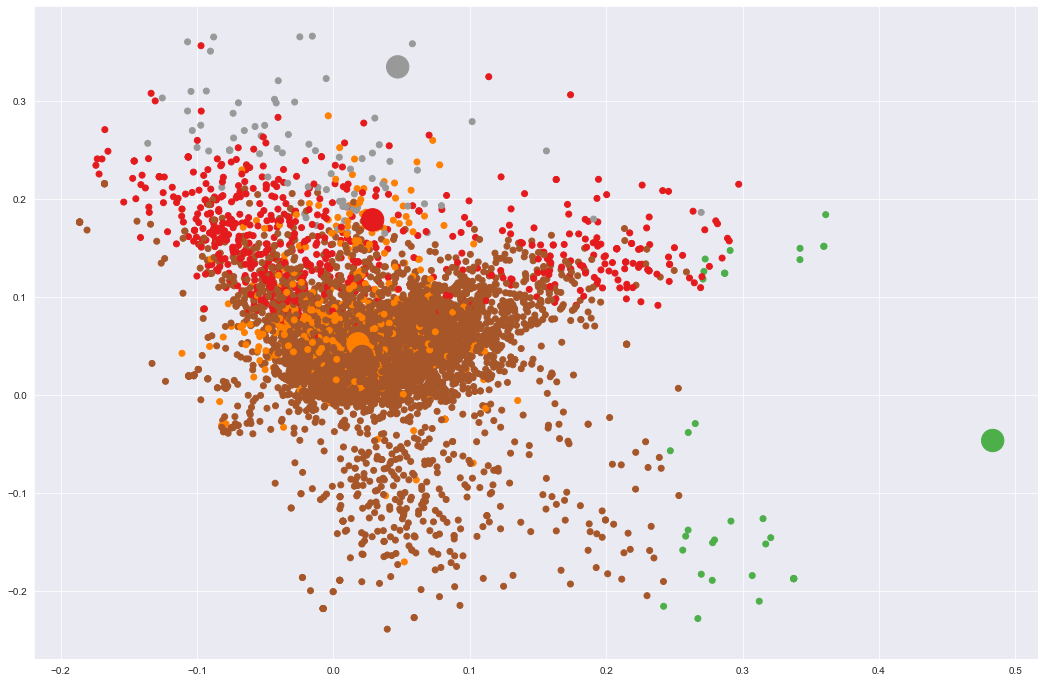

In [57]:
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=full_data['kmeans_label'], cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=sorted(full_data['kmeans_label'].unique()), s=[500, 500, 500, 500, 500], cmap='Set1')

In [58]:
fig_centers = px.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], color=sorted(full_data['kmeans_label'].unique()), size=[500, 500, 500, 500, 500])
fig_points = px.scatter(x=d2_points[:, 0], y=d2_points[:, 1], color=full_data['kmeans_label'])
fig = go.Figure(data=fig_centers.data)
fig.add_traces(fig_points.data)
fig.show()